# Preface
* Hi! This is my first attempt in data science competition.This project not only put my knowledge from books to practice and also improve my coding skills.
* During the whole journey, I read lots of amazing kernels which help me in every espects. I list some of them below, and you can explore more helpful kernels in kaggle.And this is the main reason why I want to write this kernel and share it to all of you.I believe what counts in this community is everyone's contributions to this.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


# Step1 Import data

Let's take the first look on these features 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sample_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
train[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [6]:
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)
outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])

# Step2 Predicted values - Skewness
First of all we should observe the most important variable - the predicted variable SalePrice

We focus on the skewness and the kurtosis

Skewness: 1.890792
Kurtosis: 6.557511


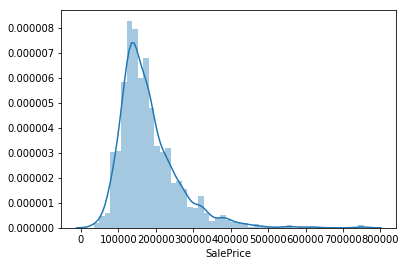

In [7]:
sns.distplot(train['SalePrice'])
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

mu = 181268.63,
sigma = 79370.09

 mu=12.03, sigma=0.40


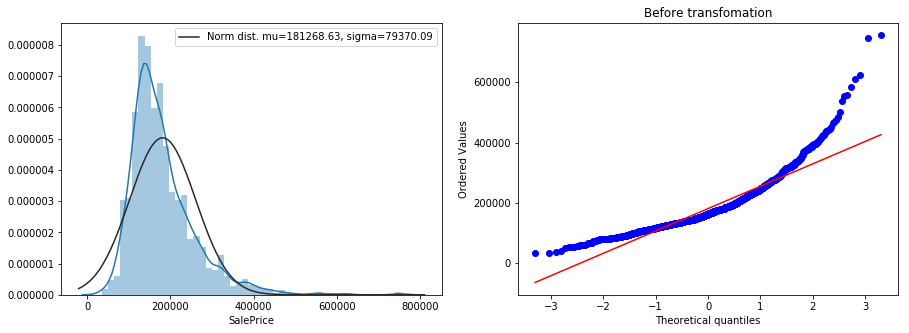

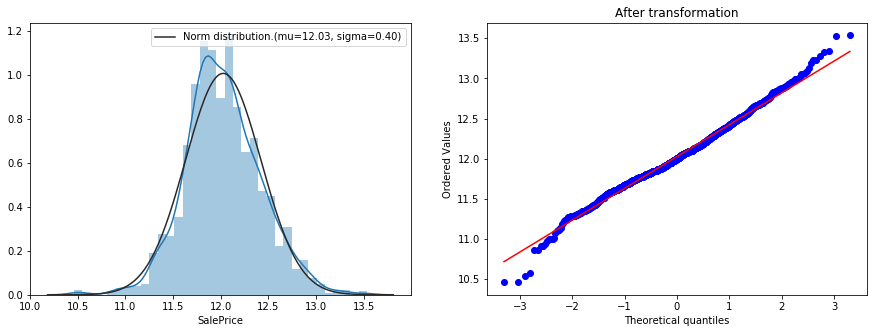

In [8]:
#the qq-plot before log-transfomation
from scipy import stats
from scipy.stats import norm
fig = plt.figure(figsize=(15,5)) #这里要记得写等于
plt.subplot(1,2,1) #如果需要一行多幅图 需要在这里先制定是哪一幅图
sns.distplot(train["SalePrice"], fit=norm)
mu, sigma = norm.fit(train['SalePrice'])
#plt.legend(['Norm dist. mu = %f, sigma = %f' %(mu,sigma)], loc='upper right')
plt.legend(['Norm dist. mu={:.2f}, sigma={:.2f}'.format(mu,sigma)])
plt.subplot(1,2,2)
stats.probplot(train['SalePrice'],plot=plt)
plt.title('Before transfomation')
print('mu = {:.2f},\nsigma = {:.2f}'.format(mu,sigma))

#Do the transformation
train.SalePrice = np.log1p(train.SalePrice)
y_train = train.SalePrice.values
y_train_orig = train.SalePrice
#the reason why we do this is because the models like linear regression and SVM need the data to be norm distribution.

#after the transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice, fit=norm)
mu, sigma = norm.fit(train.SalePrice)
plt.legend(['Norm distribution.(mu={:.2f}, sigma={:.2f})'.format(mu, sigma)])
plt.subplot(1,2,2)
plt.ylabel('Frequency')
stats.probplot(train.SalePrice, plot=plt)
plt.title('After transformation')
print('\n mu={:.2f}, sigma={:.2f}'.format(mu,sigma))

From the results below we know that the predicted variable has skew

In [9]:
train_X = train.drop('SalePrice',axis=1)
data_features = pd.concat((train_X, test)).reset_index(drop=True)
print(data_features.shape)
data_features.columns
#We concatenate the train set and the test set since we need to handle the data both on the train set and the test set.

(2912, 79)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
data_features[['MSSubClass', 'MSZoning']]

,MSSubClass,MSZoning
0,60,RL
1,20,RL
2,60,RL
3,70,RL
4,60,RL
...,...,...
2907,160,RM
2908,160,RM
2909,20,RL
2910,85,RL


# Step3 The missing values
After handling the predicted variables, now we have to handle the variables. First we have to observe the missing values.

In [11]:
data_features_na = data_features.isnull().sum().sort_values(ascending=False)
data_features_na = data_features_na[data_features_na>0]
data_features_na

PoolQC          2903
MiscFeature     2807
Alley           2715
Fence           2344
FireplaceQu     1418
LotFrontage      486
GarageCond       158
GarageQual       158
GarageYrBlt      158
GarageFinish     158
GarageType       156
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [12]:
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
percent = percent[percent>0]
pd.concat([data_features_na, percent],axis=1,keys=['total', 'percent'])

,total,percent
PoolQC,2903,0.996909
MiscFeature,2807,0.963942
Alley,2715,0.932349
Fence,2344,0.804945
FireplaceQu,1418,0.486951
LotFrontage,486,0.166896
GarageCond,158,0.054258
GarageQual,158,0.054258
GarageYrBlt,158,0.054258
GarageFinish,158,0.054258


In [13]:
#fill the missing values
x = data_features.loc[(data_features['LotArea'].notnull()), 'LotArea']
y = data_features.loc[(data_features['LotFrontage'].notnull()), 'LotFrontage']
t = (x<25000) & (y<150)
coef = np.polyfit(x[t], y[t],1)
formula = np.poly1d(coef)
poly_y = formula(data_features['LotArea'])
condition_frontage = (data_features['LotFrontage'].isnull())
data_features.loc[condition_frontage,'LotFrontage'] = formula(data_features.loc[condition_frontage,'LotArea'])

garage_var = ['GarageYrBlt','GarageCond','GarageFinish','GarageQual']
condition1 = (data_features['GarageYrBlt'].isnull() & data_features['GarageType'].notnull())
for col in garage_var:
    data_features.loc[condition1,col] = data_features[(data_features['GarageType'] == 'Detchd')][col].mode()[0]
    
condition2 = (data_features['BsmtFinType1'].notnull() & data_features['BsmtExposure'].isnull())
data_features.loc[condition2,'BsmtExposure'] = 'No'

condition3 = (data_features['BsmtFinType1'].notnull() & data_features['BsmtCond'].isnull())
data_features.loc[condition3,'BsmtCond'] = 'TA'

condition4 = (data_features['BsmtFinType1'].notnull() & data_features['BsmtQual'].isnull())
data_features.loc[condition4,'BsmtQual'] = data_features.loc[(data_features['BsmtExposure'] == 'No'),'BsmtQual'].mode()[0]

condition5 = (data_features['BsmtFinType2'].isnull() & data_features['BsmtFinType1'].notnull())
data_features.loc[condition5, 'BsmtFinType2'] = 'Unf'

bsmt_var = ['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2']
garage_var = ['GarageType','GarageCond','GarageFinish','GarageQual']
NONE_var = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for col in bsmt_var, garage_var,NONE_var:
    data_features[col] = data_features[col].fillna('None')
data_features['GarageYrBlt'] = data_features['GarageYrBlt'].fillna(0)

condition6 = (data_features['MasVnrType'].isnull() & data_features['MasVnrArea'].notnull())
data_features.loc[condition6,'MasVnrType'] = 'Stone'

data_features['MasVnrType'] = data_features['MasVnrType'].fillna('None')
data_features['MasVnrArea'] = data_features['MasVnrArea'].fillna(0)

data_features['MSZoning'] = data_features['MSZoning'].groupby(
    data_features['MSSubClass']).transform(lambda x:x.fillna(x.mode()[0]))

NA_for_0 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
            'GarageArea', 'GarageCars','MasVnrArea']
for col in NA_for_0:
    data_features[col] = data_features[col].fillna(0)
    
common_for_NA = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for col in common_for_NA:
    data_features[col].fillna(data_features[col].mode()[0], inplace = True)
    
data_features['Functional'] = data_features['Functional'].fillna('Typ')
data_features['Utilities'] = data_features['Utilities'].fillna('None')

In [14]:
#Now the check the missing values
missing_data = data_features.isnull().sum().sort_values(ascending = False)
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

## Step4 Data preprocessing and Feature Engineering

In [15]:
#Some number features stand for categories.
str_var = ["MSSubClass",'MoSold','YrSold']
for var in str_var:
    data_features[var] = data_features[var].apply(str)

In [16]:
#Mapping values for categorical features.
#I map values as much as possible though other kernels choose some of them to transform.
data_features["MSSubClass"] = data_features.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})

data_features["MSZoning"] = data_features.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})

data_features["Street"] = data_features.Street.map({'Grvl':1, 'Pave':2})

data_features["Alley"] = data_features.Alley.map({'None':0, 'Grvl':1, 'Pave':2})

data_features["LotShape"] = data_features.LotShape.map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':3})

data_features["LandContour"] = data_features.LandContour.map({'Bnk':1, 'Lvl':2, 'Low':3, 'HLS':4})

data_features["Utilities"] = data_features.Utilities.map({'NoSeWa':0, 'None':0,'AllPub':1})

data_features["LotConfig"] = data_features.LotConfig.map({'Inside':1, 'Corner':1, 'CulDSac':2, 'FR2':1, 'FR3':2})

data_features["LandSlope"] = data_features.LandSlope.map({'Gtl':1, 'Mod':2, 'Sev':2})

data_features["Neighborhood"] = data_features.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
data_features["Condition1"] = data_features.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
data_features["BldgType"] = data_features.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
data_features["HouseStyle"] = data_features.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
data_features['RoofStyle'] = data_features.RoofStyle.map({'Gambrel':1, 'Gable':2, 'Flat':3, 'Hip':3, 'Mansard':3, 'Shed':4})

data_features["Exterior1st"] = data_features.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
data_features["MasVnrType"] = data_features.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
data_features["ExterQual"] = data_features.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
data_features["Foundation"] = data_features.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
data_features["BsmtQual"] = data_features.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})

data_features["BsmtCond"] = data_features.BsmtCond.map({'Fa':2, 'None':0, 'TA':3, 'Gd':4, 'Po':1})
    
data_features["BsmtExposure"] = data_features.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
data_features["Heating"] = data_features.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
data_features["HeatingQC"] = data_features.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

data_features['CentralAir'] = data_features.CentralAir.map({'N':1, 'Y':2})

data_features["Electrical"] = data_features.Electrical.map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
    
data_features["KitchenQual"] = data_features.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
data_features["Functional"] = data_features.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
data_features["FireplaceQu"] = data_features.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
data_features["GarageType"] = data_features.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
data_features["GarageFinish"] = data_features.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})

data_features["GarageQual"] = data_features.GarageQual.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':4})
    
data_features["PavedDrive"] = data_features.PavedDrive.map({'N':1, 'P':2, 'Y':3})

data_features["PoolQC"] = data_features.PoolQC.map({'None':0, 'Gd':1, 'Fa':1, 'Ex':2})
    
data_features["SaleType"] = data_features.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
data_features["SaleCondition"] = data_features.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})

In [17]:
#For variables about years,we use labelencoder method to transform. 
#You can also use one-hot encode but I don't like the dimensional disaster...
le = preprocessing.LabelEncoder()
#ohe = preprocessing.OneHotEncoder()
Year_var = ['YearBuilt','YearRemodAdd','GarageYrBlt']
for var in Year_var:
    data_features[var] = le.fit_transform(data_features[var])
data_features[Year_var]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,110,53,95
1,83,26,68
2,108,52,93
3,25,20,90
4,107,50,92
...,...,...,...
2907,77,20,0
2908,77,20,62
2909,67,46,52
2910,99,42,0


In [18]:
data_features['MasVnrScore'] = data_features['MasVnrType'] * data_features['MasVnrArea']
data_features['BsmtScore2'] = data_features['BsmtQual'] * data_features['BsmtCond'] * data_features['BsmtExposure']
data_features['TotalSF'] = data_features['TotalBsmtSF'] + data_features['1stFlrSF'] + data_features['2ndFlrSF']
data_features["AllSF"] = data_features["GrLivArea"] + data_features["TotalBsmtSF"]
data_features['TotalBath'] = data_features['FullBath'] + 0.5*data_features['HalfBath'] + data_features['BsmtFullBath'] + 0.5*data_features['BsmtHalfBath']
data_features['Total_porch_sf'] = data_features['OpenPorchSF'] + data_features['3SsnPorch'] + data_features['EnclosedPorch'] + data_features['ScreenPorch'] + data_features['WoodDeckSF']

In [19]:
train1 = data_features[:len(y_train)]
train1.loc[:,'SalePrice'] = y_train
corr1 = train1.corr()['SalePrice'].sort_values(ascending = False)
corr15 = corr1[:15]
corr15

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


SalePrice       1.000000
TotalSF         0.829785
AllSF           0.825747
OverallQual     0.824807
Neighborhood    0.750202
GrLivArea       0.728824
ExterQual       0.683785
GarageCars      0.683090
TotalBath       0.675576
KitchenQual     0.670858
GarageArea      0.658926
TotalBsmtSF     0.652376
BsmtQual        0.652064
1stFlrSF        0.623168
GarageFinish    0.608576
Name: SalePrice, dtype: float64

In [20]:
#Polynomial on the top 10 features.For the features have connection themself, only use one to do polynomail.
corr10 = corr15.drop(['SalePrice','AllSF','1stFlrSF','GarageFinish','GarageArea'])
corr10_var = corr10.index.tolist()
for col in corr10_var:
    data_features[col + '-2'] = data_features[col] **2
    data_features[col + '-3'] = data_features[col] **3
    data_features[col + '-sqrt'] = np.sqrt(data_features[col])



# step 5 Numerical and Categorial features

We have to split data into the numerical variables and categorial features.
* For numerical features, we have to adjust their skewness.
* For categorical features(those we don't encode them ), we use get_dummies to encode them with one-hot.

In [21]:
cat_features = data_features.select_dtypes(include = ['object']).columns
num_features = data_features.select_dtypes(exclude = ['object']).columns
print(cat_features)
print('Categorial features :' + str(len(cat_features)) + '\n')

print(num_features)
print('Numerical features :' + str(len(num_features)))

Index(['Condition2', 'RoofMatl', 'Exterior2nd', 'ExterCond', 'BsmtFinType1',
       'BsmtFinType2', 'GarageCond', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold'],
      dtype='object')
Categorial features :11

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'TotalBath-sqrt', 'KitchenQual-2', 'KitchenQual-3', 'KitchenQual-sqrt',
       'TotalBsmtSF-2', 'TotalBsmtSF-3', 'TotalBsmtSF-sqrt', 'BsmtQual-2',
       'BsmtQual-3', 'BsmtQual-sqrt'],
      dtype='object', length=104)
Numerical features :104


In [22]:
data_num = data_features[num_features]
data_cat = data_features[cat_features]
data_num.head()
data_cat.head()

,Condition2,RoofMatl,Exterior2nd,ExterCond,BsmtFinType1,BsmtFinType2,GarageCond,Fence,MiscFeature,MoSold,YrSold
0,Norm,CompShg,VinylSd,TA,GLQ,Unf,TA,None,None,2,2008
1,Norm,CompShg,MetalSd,TA,ALQ,Unf,TA,None,None,5,2007
2,Norm,CompShg,VinylSd,TA,GLQ,Unf,TA,None,None,9,2008
3,Norm,CompShg,Wd Shng,TA,ALQ,Unf,TA,None,None,2,2006
4,Norm,CompShg,VinylSd,TA,GLQ,Unf,TA,None,None,12,2008


For numerical features , we need to observe their skewness just like the predicted variable.

In [23]:
skew_features = data_num.skew().sort_values(ascending = False)
skew_features

TotalBsmtSF-3    22.246997
MiscVal          21.932153
PoolQC           20.686517
PoolArea         17.682463
TotalSF-3        16.884386
                   ...    
Functional       -3.782910
Electrical       -4.190230
Heating         -11.487491
Street          -15.489285
Utilities       -31.123392
Length: 104, dtype: float64

Now we use box-cox transformation to get rid of the skewness of the variables which is different from the predicted variable.

And we just handle the variables whose abs skewness > 0.5

In [24]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.base import BaseEstimator, TransformerMixin

In [25]:
class skewness__dummies(BaseEstimator, TransformerMixin):
    def __init__(self, skew = 0.5):
            pass
    def fit(self, X, y = None):
            return self
    def transform(self, X, y = None):
            num_fea = X.select_dtypes(exclude = ['object'])
            skew_fea = X[abs(num_fea.skew()) > skew ].index
            X[skew_fea] = boxcox1p(X.loc[:,skew_fea], boxcox_normmax(X.loc[:,skew_fea]))
            X = pd.get_dummies(X)
            return X
            

In [26]:
skew_features = skew_features[abs(skew_features) > 0.5]
print('The mean skewness of the variables is{}'.format(np.mean(data_num.skew())))
print('There are {} features have to boxcox1p transform'.format(len(skew_features)))
skew_features

The mean skewness of the variables is1.5878546175372596
There are 81 features have to boxcox1p transform


TotalBsmtSF-3    22.246997
MiscVal          21.932153
PoolQC           20.686517
PoolArea         17.682463
TotalSF-3        16.884386
                   ...    
Functional       -3.782910
Electrical       -4.190230
Heating         -11.487491
Street          -15.489285
Utilities       -31.123392
Length: 81, dtype: float64

In [27]:
skew_features_index = skew_features.index
for features in skew_features_index:
    data_num.loc[:,features] = boxcox1p(data_num.loc[:,features], boxcox_normmax(data_num.loc[:,features] + 1) )
    data_num.loc[:,features] = boxcox1p(data_num.loc[:,features], boxcox_normmax(data_num.loc[:,features] + 1))
    
print('After the transformation the mean skewness of the features is {}'.format(np.mean(data_num.skew())))
data_num.skew().sort_values(ascending = False)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


After the transformation the mean skewness of the features is 0.26981191490615425


PoolQC          18.018767
PoolArea        15.584398
3SsnPorch        8.846023
LowQualFinSF     8.594439
MiscVal          5.233423
                  ...    
CentralAir      -3.477664
Functional      -3.520593
Heating         -7.984169
Street         -15.489285
Utilities      -31.123392
Length: 104, dtype: float64

# Step6 Data visualization

In [28]:
len(data_features)

2912

# Step8 Preparing the data

In [29]:
final_features = pd.get_dummies(data_features)
X_train = final_features.iloc[:len(y_train),:]
X_test = final_features.iloc[len(y_train):,:]
print('The shape of train set is{},y set is{},and the shape of test set is{}'.format(X_train.shape,y_train.shape,X_test.shape))

The shape of train set is(1453, 187),y set is(1453,),and the shape of test set is(1459, 187)


In [30]:
type(X)

NameError: name 'X' is not defined

In [31]:
X.isnull().sum().sort_values(ascending = False)

NameError: name 'X' is not defined

# 这里是分割线 下面的内容都是抄的玩意

In [32]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [33]:
kfolds = KFold(n_splits=18, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [34]:
models = {'XGBoost':XGBRegressor(n_estimators=1000,
                                max_depth=6,
                                objective ='reg:squarederror')}

In [35]:
models.keys()

dict_keys(['XGBoost'])

In [36]:
for name in models.keys():
    model = models[name]
    model.fit(X_train, y_train)
    scores = cv_rmse(model,X_train, y_train)
    print(scores.mean)

<built-in method mean of numpy.ndarray object at 0x7fa76e8757b0>


In [37]:
scores.mean()

0.10889390541913628

In [38]:
sample_submission.iloc[:,1] = (np.expm1(model.predict(X_test)))
sample_submission

,Id,SalePrice
0,1461,126174.375000
1,1462,163493.671875
2,1463,200713.078125
3,1464,193978.281250
4,1465,195758.812500
...,...,...
1454,2915,77468.593750
1455,2916,81292.429688
1456,2917,166046.640625
1457,2918,110367.906250


In [39]:
sample_submission.to_csv("submission.csv", index=False)